# SINIFLANDIRMA PROBLEMLERI

* [Logistic Regression](#lr)
    * [Model](#lr_model)
    * [Tuning](#lr_tuning)
* [Naive Bayes](#nb)
    * [Model & Tahmin](#nb_model)
* [K-En Yakın Komşu (KNN)](#knn)
    * [Model & Tahmin](#knn_model)
    * [Model Tuning](#knn_model_tuning)
* [Destek Vektör Sınıflandırıcısı (SVC)](#svc)
    * [Model & Tahmin](#svc_model)
    * [Model Tuning](#svc_model_tuning)
* [Doğrusal Olmayan SVC](#non_svc)
    * [Model & Tahmin](#non_svc_model)
    * [Model Tuning](#non_svc_model_tuning)
* [Yapay Sinir Ağları (Artificial Neural Network)](#ysa)
    * [Model & Tahmin](#ysa_model)
    * [Model Tuning](#ysa_model_tuning)
* [Sınıflandırma Ağaçları (CART)](#cart)
    * [Model & Tahmin](#cart_model)
    * [Model Tuning](#cart_model_tuning)
* [Random Forests(RF)](#rf)
    * [Model & Tahmin](#rf_model)
    * [Model Tuning](#rf_model_tuning)
* [Gradient Boosting Machines (GBM)](#gbm)
    * [Model & Tahmin](#gbm_model)
    * [Model Tuning](#gbm_model_tuning)
* [XGBoost](#xgb)
    * [Model & Tahmin](#xgb_model)
    * [Model Tuning](#xgb_model_tuning)
* [LightGBM](#lgbm)
    * [Model & Tahmin](#lgbm_model)
    * [Model Tuning](#lgbm_model_tuning)
* [CatBoost](#cb)
    * [Model & Tahmin](#cb_model)
    * [Model Tuning](#cb_model_tuning)
* [TÜM MODELLERİN KARŞILAŞTIRMASI](#son)

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Lojistik Regresyon <a id="lr"/>

Amaç sınıflandırma problemi için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır.

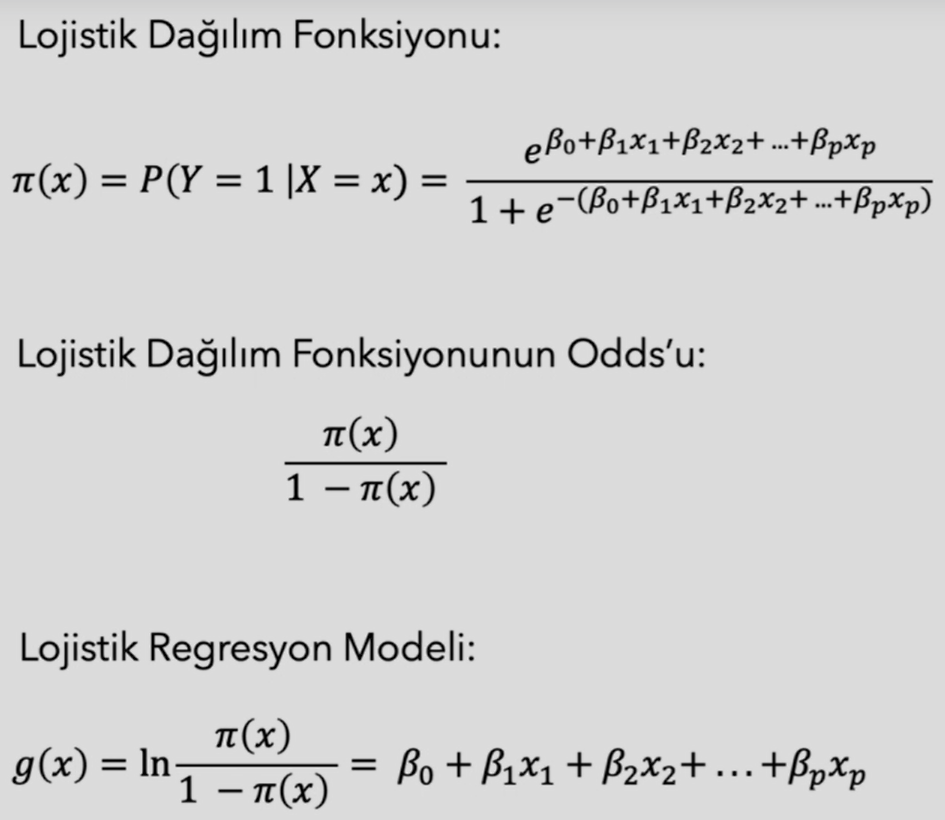

* Bağımlı değişken kategoriktir
* Adını bağımlı değişkene uygulanan logit dönüşümden alır.
* Doğrusal regresyonda aranan varsayımlar burada aranmadığı için daha esnek kullanılabilirliği vardır.
* Bağımlı değişkenin 1 olarak tanımlanan değerinin gerçekleşme olasılığı hesaplanır. Dolayısıyla bağımlı değişkenin alacağı değer ile ilgilenilmez.
* Lojistik fonksiyonu sayesinde üretilen değerler 0-1 arasında olur.

## Model <a id="lr_model"/>

In [2]:
diabets = pd.read_csv("diabetes.csv")
df = diabets.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [5]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

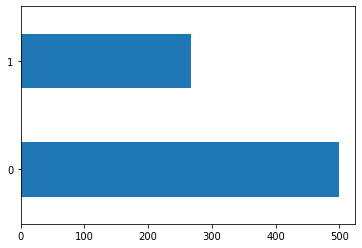

In [6]:
df["Outcome"].value_counts().plot.barh()

In [7]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [8]:
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Wed, 29 Apr 2020   Pseudo R-squ.:                 0.05922
Time:                        03:55:08   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [9]:
# Sci-kit Learn

In [10]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver='liblinear')
loj_model = loj.fit(X, y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
loj_model.intercept_

array([-5.89159518])

In [12]:
loj_model.coef_ # Katsayılar

array([[ 1.17052230e-01,  2.83873955e-02, -1.68897224e-02,
         7.55274087e-04, -6.42755924e-04,  5.97603789e-02,
         6.77671880e-01,  7.23947807e-03]])

## Tahmin & Model Tuning <a id = "lr_tuning"/>

In [13]:
y_pred = loj_model.predict(X)

In [14]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [15]:
accuracy_score(y, y_pred)

0.7747395833333334

In [16]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [17]:
loj_model.predict(X)[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [18]:
loj_model.predict_proba(X)[:10]

array([[0.35040711, 0.64959289],
       [0.91701929, 0.08298071],
       [0.22474085, 0.77525915],
       [0.92138876, 0.07861124],
       [0.1672242 , 0.8327758 ],
       [0.79898675, 0.20101325],
       [0.88019106, 0.11980894],
       [0.2781269 , 0.7218731 ],
       [0.32060943, 0.67939057],
       [0.92272884, 0.07727116]])

In [19]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:, 1]

In [20]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [21]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7447916666666666

In [25]:
cross_val_score(loj_model, X_test, y_test, cv=10)

array([0.7       , 0.75      , 0.85      , 0.78947368, 0.84210526,
       0.68421053, 0.89473684, 0.63157895, 0.63157895, 0.5       ])

In [26]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.7273684210526316

# Naive Bayes <a id="nb"/>

Olasılık temelli bir modelleme tekniğidir. Amaç belirli bir örneğin her bir sınıfa ait olma olasılığının koşullu olasılık temelli hesaplanmasıdır.
E-ticarette bayes iyi çalışır.

## Model & Tahmin <a id="nb_model"/>

In [27]:
df = diabets.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
nb_model.predict(X_test)[:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [31]:
nb_model.predict_proba(X_test)[:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [32]:
y_pred = nb_model.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [34]:
cross_val_score(nb_model, X_test, y_test, cv=10).mean()

0.775

# K-En Yakın Komşu (KNN) <a id="knn" />

Tahminler gözlem benzerliğine göre yapılır.

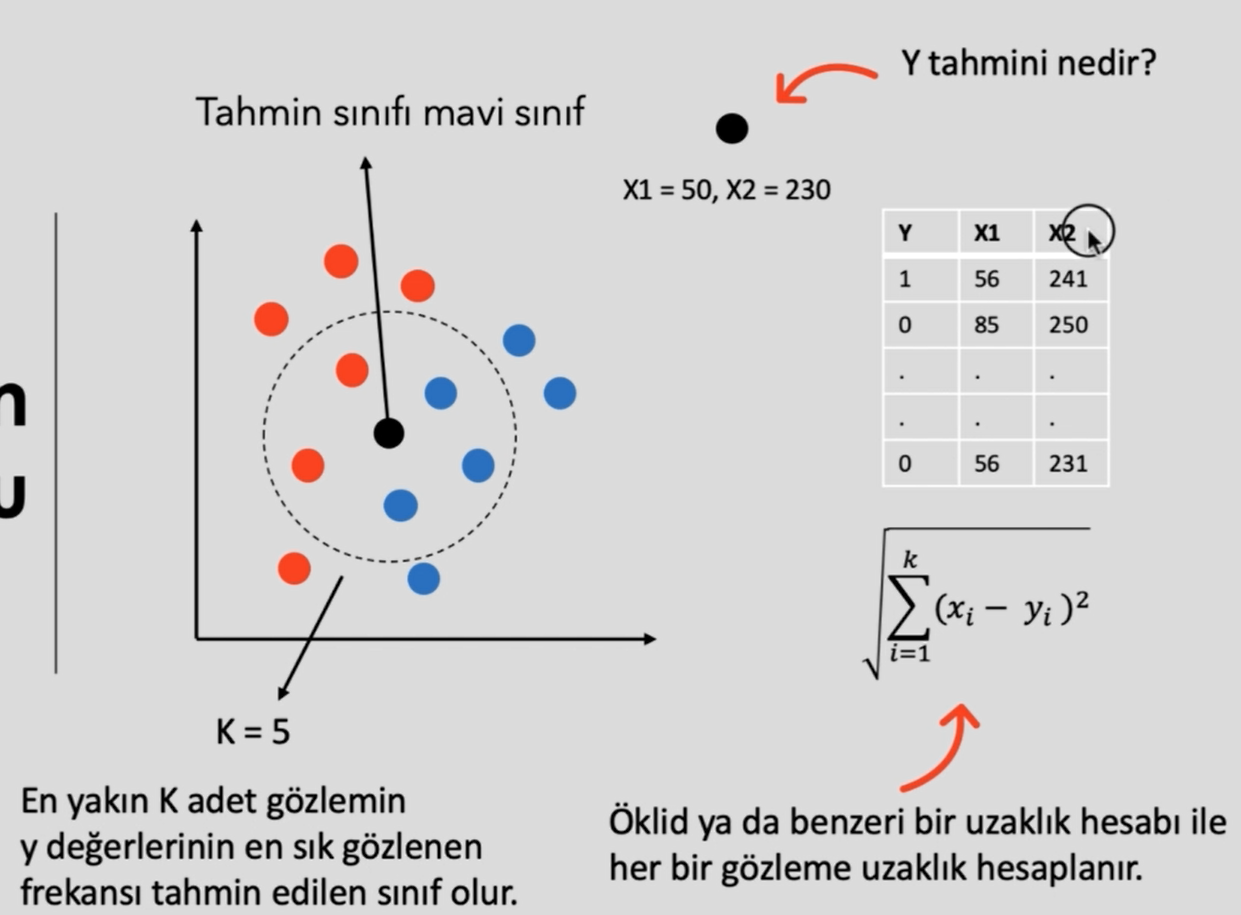

#### KNN Basamakları
* Komşu sayısını belirle(k)
* Bilinmeyen nokta ile diğer tüm noktalar arasındaki uzaklıkları hesapla
* Uzaklıkları sırala ve belirlenen k sayısına göre en yakın olan k gözlemini seç
* Sınıflandırma ise en sık sınıf, regresyon ise ortalama değeri tahmin değeri olarak ver.

## Model & Tahmin <a id="knn_model" />

In [35]:
df = diabets.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [36]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
y_pred = knn_model.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



## Model Tuning <a id="knn_model_tuning" />

In [40]:
knn_params = {"n_neighbors":np.arange(1, 50)}

In [44]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
print("En iyi score : ", str(knn_cv.best_score_))
print("En iyi parametreler: ", str(knn_cv.best_params_))

En iyi score :  0.7486033519553073
En iyi parametreler:  {'n_neighbors': 11}


In [52]:
knn = KNeighborsClassifier(n_neighbors=11)
knn_tuned = knn.fit(X_train, y_train)

In [53]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [54]:
y_true = knn_tuned.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred)

0.6883116883116883

# Destek Vektör Sınıflandırıcısı (SVC) <a id="svc"/>

Amaç iki sınıf arasındaki ayrımın optimum olmasını sağlayacak hiper-düzlemi bulmaktır.

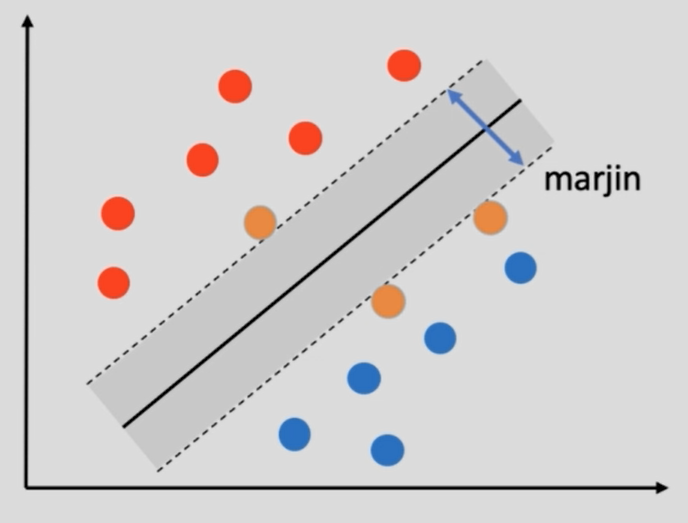

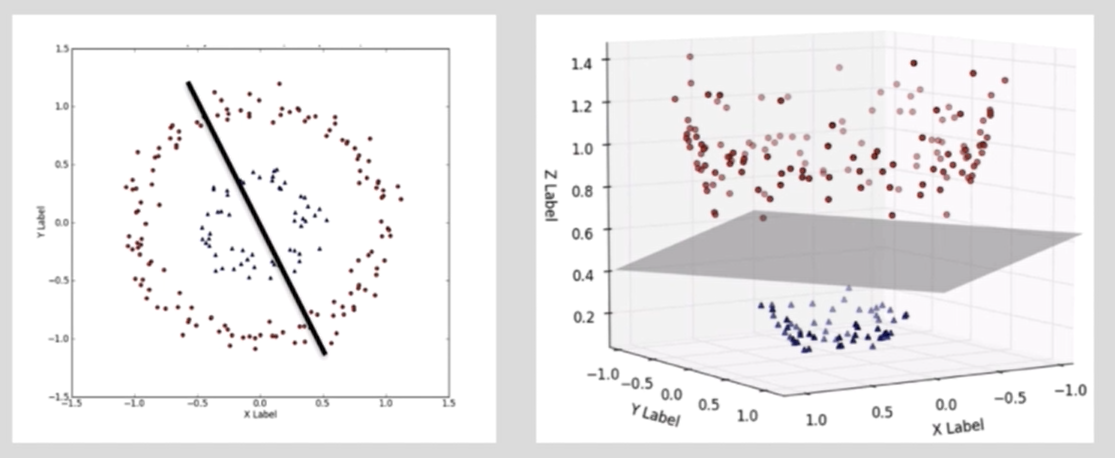

## Model & Tahmin <a id = "svc_model"/>

In [56]:
df = diabets.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [57]:
svm_model = SVC(kernel="linear").fit(X_train, y_train)

In [58]:
svm_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [59]:
y_pred = svm_model.predict(X_test)

In [60]:
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning <a id="svc_model_tuning"/>

In [61]:
svc_params = {"C":np.arange(1, 10)}

svc = SVC(kernel="linear")

svc_cv_model = GridSearchCV(svc, svc_params, cv=10, n_jobs=-1, verbose = 2)
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  5.0min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [63]:
print("En iyi score : ", str(svc_cv_model.best_score_))
print("En iyi parametreler: ", str(svc_cv_model.best_params_))

En iyi score :  0.776536312849162
En iyi parametreler:  {'C': 5}


In [67]:
svc = SVC(kernel="linear", C = 5)
svc_tuned_model = svc.fit(X_train, y_train)

In [68]:
y_pred = svc_tuned_model.predict(X_test)

In [69]:
accuracy_score(y_test, y_pred)

0.7445887445887446

# SVC RBF (Lineer Olmayan) <a id="non_svc" />

## Model & Tahmin <a id="non_svc_model" />

In [70]:
df = diabets.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [71]:
svc_model = SVC(kernel="rbf").fit(X_train, y_train) # Lineer olmayan

In [72]:
svc_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [73]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6536796536796536

## Model Tuning <a id="non_svc_model_tuning" />

In [74]:
svc_params = {"C":[0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
             "gamma":[0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]}

svc = SVC(kernel='rbf')

svc_cv_model = GridSearchCV(svc, svc_params, cv=10, n_jobs=-1, verbose = 2)
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    5.5s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [75]:
svc_cv_model.best_params_

{'C': 10, 'gamma': 0.0001}

In [76]:
svc = SVC(kernel='rbf', C = 10, gamma = 0.0001)
svc_tuned_model = svc.fit(X_train, y_train)
svc_tuned_model

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
y_pred = svc_tuned_model.predict(X_test)

In [78]:
accuracy_score(y_test, y_pred)

0.7359307359307359

# Yapay Sinir Ağları (YSA) <a id="ysa" />

İnsan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarından birisidir.

## Model & Tahmin <a id="ysa_model" />

In [79]:
df = diabets.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()

In [82]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [90]:
from sklearn.neural_network import MLPClassifier

In [91]:
mlp = MLPClassifier()
mlp_model = mlp.fit(X_train_scaled, y_train)
mlp_model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [92]:
y_pred = mlp.predict(X_test_scaled)

In [93]:
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning <a id="ysa_model_tuning" />

In [94]:
parameter = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0000, 0.0001, 0.05, 0.01, 0.1],
    'learning_rate': ['constant','adaptive'],
}

In [95]:
mlp = MLPClassifier()
mlp_cv_model = GridSearchCV(mlp, parameter, cv=10, n_jobs=-1, verbose = 2)
mlp_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  5.6min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0, 0.0001, 0.05, 0.01, 0.1],
                

In [96]:
mlp_cv_model.best_params_

{'activation': 'tanh',
 'alpha': 0.05,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [114]:
mlp = MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(100,), learning_rate='constant', solver='adam')

In [115]:
mlp_tuned = mlp.fit(X_train_scaled, y_train)

In [116]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [117]:
accuracy_score(y_test, y_pred)

0.7532467532467533

# Sınıflandırma Ağaçları (CART) <a id="cart" />

## Model & Tahmin <a id="cart_model" />

In [137]:
df = diabets.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
#X = df["Pregnancies"]
#X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [138]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [146]:
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [147]:
from skompiler import skompile

In [148]:
print(skompile(cart_model.predict).to('python/code'))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((1 if x[1] <= 123.0 else 0) if x[2] <= 65.0 else 0) if
    x[2] <= 72.0 else 1) if x[4] <= 9.0 else (0 if x[6] <= 
    0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else 0) if x[0] <=
    4.5 else 1 if x[2] <= 67.0 else 0) if x[5] <= 49.10000038146973 else 1) if
    x[1] <= 127.5 else 1 if x[2] <= 56.0 else (0 if x[7] <= 27.5 else 0 if 
    x[3] <= 14.5 else 1) if x[5] <= 30.300000190734863 else 1 if x[5] <= 
    32.000000953674316 else ((0 if x[5] <= 33.75 else 1) if x[0] <= 0.5 else
    1 if x[5] <= 32.45000076293945 else 0) if x[2] <= 85.0 else 1) if x[7] <=
    28.5 else (1 if x[7] <= 29.5 else (0 if x[1] <= 133.0 else (0 if x[0] <=
    3.5 else 1) if x[0] <= 4.5 else 0) if x[2] <= 94.0 else 1 if x[6] <= 
    0.6269999742507935 else 0) if x[5] <= 26.949999809265137 else (1 if x[1
    ] <= 28.5 else 

In [149]:
#x = [3] # Kaç hamilelik geçirdi?

In [151]:
#((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

In [152]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7186147186147186

## Model Tuning <a id="cart_model_tuning" />

In [153]:
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [154]:
cart_grid = {"max_depth" : list(range(1, 10)),
            'min_samples_split' : range(2, 50)}

In [155]:
cart = DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv=10, n_jobs=-1)
cart_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': range(2, 50)},
         

In [156]:
cart_cv.best_params_

{'max_depth': 5, 'min_samples_split': 19}

In [157]:
cart = DecisionTreeClassifier(max_depth=5, min_samples_split=19)
cart_tuned = cart.fit(X_train, y_train)

In [158]:
y_pred = cart_tuned.predict(X_test)

In [159]:
accuracy_score(y_test, y_pred)

0.7532467532467533

# Random Forests (RF) <a id="rf" />

## Model & Tahmin <a id="rf_model" />

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [163]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.70995670995671

## Model Tuning <a id="rf_model_tuning" />

In [164]:
rf_params = {"max_depth":[2, 5, 8, 10],
            "max_features":[2, 5, 8],
            "n_estimators": [10, 500, 1000],
            "min_samples_split":[2, 5, 10]}

In [165]:
rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2)

In [166]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.4min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [167]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 2,
 'min_samples_split': 5,
 'n_estimators': 10}

In [176]:
rf_tuned_model = RandomForestClassifier(max_depth = 10, max_features = 2, n_estimators = 5, min_samples_split = 10)
rf_tuned_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [177]:
y_pred = rf_tuned_model.predict(X_test)

In [178]:
accuracy_score(y_test, y_pred)

0.7532467532467533

In [179]:
Importance = pd.DataFrame({"Importance":rf_tuned_model.feature_importances_*100}, index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

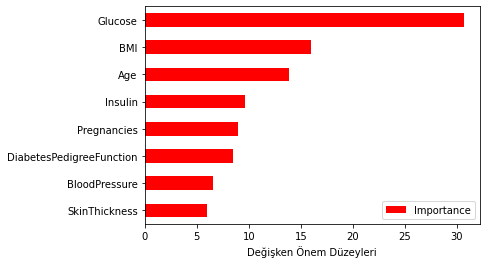

In [180]:
Importance.sort_values(by = "Importance", axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines (GBM) <a id="gbm" />

## Model & Tahmin <a id="gbm_model" />

In [181]:
df = diabets.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
#X = df["Pregnancies"]
#X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [182]:
from sklearn.ensemble import GradientBoostingClassifier

In [183]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [184]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

In [185]:
gbm_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Model Tuning <a id="gbm_model_tuning" />

In [186]:
gbm_params = {"learning_rate":[0.001, 0.01, 0.1, 0.05],
             "n_estimators":[100, 500, 1000],
             "max_depth":[3, 5, 10],
             "min_samples_split":[2, 5, 10]}

In [187]:
gbm = GradientBoostingClassifier()
gbm_cv = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1, verbose=2)

In [188]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.8min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...None,
                                                  presort='auto

In [189]:
gbm_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_split': 5,
 'n_estimators': 500}

In [192]:
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.01, n_estimators = 500, max_depth = 3, min_samples_split = 5).fit(X_train, y_train)

In [193]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

# XGBoost <a id="xgb" />

## Model & Tahmin <a id="xgb_model" />

In [194]:
df = diabets.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
#X = df["Pregnancies"]
#X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [195]:
from xgboost import XGBClassifier

In [196]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [197]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning <a id="xgb_model_tuning" />

In [198]:
xgb_model

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [199]:
xgb_params = {"n_estimators":[100, 500, 1000, 2000],
             "subsample":[0.6, 0.8, 1],
             "max_depth":[3, 4, 5, 6],
             "learning_rate":[0.1, 0.01, 0.02, 0.05],
             "min_samples_split":[2, 5, 10]}

In [200]:
xgb = XGBClassifier()
xgb_cv = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2)
xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 11.4min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constra...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='warn', n_jobs=-1,
             param_

In [201]:
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1}

In [202]:
xgb = XGBClassifier(learning_rate = 0.01, max_depth = 3, min_samples_split = 2, n_estimators = 100, subsample=1)

In [203]:
xgb_tuned = xgb.fit(X_train, y_train)

In [204]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

# LightGBM <a id="lgbm" />

## Model & Tahmin <a id="lgbm_model" />

In [205]:
from lightgbm import LGBMClassifier

In [206]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [207]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

## Model Tuning <a id="lgbm_model_tuning" />

In [208]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [209]:
lgbm_params = {"n_estimators":[100, 500, 1000, 2000],
             "subsample":[0.6, 0.8, 1],
             "max_depth":[3, 4, 5, 6],
             "learning_rate":[0.1, 0.01, 0.02, 0.05],
             "min_child_samples":[20, 15, 10]}

In [210]:
lgbm = XGBClassifier()
lgbm_cv = GridSearchCV(lgbm, lgbm_params, cv=10, n_jobs=-1, verbose=2)
lgbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 239 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 725 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1090 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1535 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2062 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2669 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 3358 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 4127 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 4978 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 11.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constra...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='warn', n_jobs=-1,
             param_

In [212]:
lgbm_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_samples': 20,
 'n_estimators': 100,
 'subsample': 1}

In [213]:
lgbm = XGBClassifier(learning_rate = 0.01, max_depth = 3, min_child_samples = 20, n_estimators = 100, subsample=1)
lgbm_tuned = lgbm.fit(X_train, y_train)

In [214]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

# CatBoost <a id="cb" /> 

## Model & Tahmin <a id="cb_model" />

In [215]:
from catboost import CatBoostClassifier

In [217]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.0079
0:	learn: 0.6879822	total: 67.1ms	remaining: 1m 6s
1:	learn: 0.6843544	total: 68.8ms	remaining: 34.3s
2:	learn: 0.6805937	total: 70.4ms	remaining: 23.4s
3:	learn: 0.6766011	total: 72ms	remaining: 17.9s
4:	learn: 0.6721103	total: 73.6ms	remaining: 14.6s
5:	learn: 0.6681927	total: 75.2ms	remaining: 12.5s
6:	learn: 0.6642263	total: 76.8ms	remaining: 10.9s
7:	learn: 0.6603263	total: 78.4ms	remaining: 9.72s
8:	learn: 0.6563030	total: 80ms	remaining: 8.8s
9:	learn: 0.6528911	total: 81.7ms	remaining: 8.09s
10:	learn: 0.6488276	total: 83.4ms	remaining: 7.49s
11:	learn: 0.6455457	total: 85.1ms	remaining: 7s
12:	learn: 0.6419444	total: 86.8ms	remaining: 6.59s
13:	learn: 0.6374939	total: 88.5ms	remaining: 6.23s
14:	learn: 0.6340194	total: 90.3ms	remaining: 5.93s
15:	learn: 0.6304776	total: 92.3ms	remaining: 5.67s
16:	learn: 0.6267531	total: 94.2ms	remaining: 5.45s
17:	learn: 0.6238199	total: 96ms	remaining: 5.24s
18:	learn: 0.6204938	total: 98ms	remaining: 5.06s
19:	le

In [218]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

## Model Tuning <a id="cb_model_tuning" />

In [ ]:
cat_params = {
    "iterations":[200, 500],
    "learning_rate":[0.01, 0.05, 0.1],
    "depth":[3, 5, 8]}

In [ ]:
cat = CatBoostClassifier()
cat_cv = GridSearchCV(cat, cat_params, cv=10, n_jobs=-1, verbose=2)
#cat_cv.fit(X_train, y_train) ÇOK UZUN 

# Tüm Modellerin Karşılaştırılması <a id = 'son' />

In [220]:
modeller = [
    loj_model,
    nb_model,
    knn_tuned,
    svc_tuned_model,
    mlp_tuned,
    cart_tuned,
    rf_tuned_model,
    gbm_tuned,
    xgb_tuned,
    lgbm_tuned
]

for model in modeller:
    isimler = model.__class__.__name__
    if model == mlp_tuned:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":")
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
LogisticRegression:
Accuracy: 74.8918%
----------------------------
GaussianNB:
Accuracy: 74.4589%
----------------------------
KNeighborsClassifier:
Accuracy: 73.1602%
----------------------------
SVC:
Accuracy: 73.5931%
----------------------------
MLPClassifier:
Accuracy: 75.3247%
----------------------------
DecisionTreeClassifier:
Accuracy: 75.3247%
----------------------------
RandomForestClassifier:
Accuracy: 75.3247%
----------------------------
GradientBoostingClassifier:
Accuracy: 74.8918%
----------------------------
XGBClassifier:
Accuracy: 74.8918%
----------------------------
XGBClassifier:
Accuracy: 74.8918%


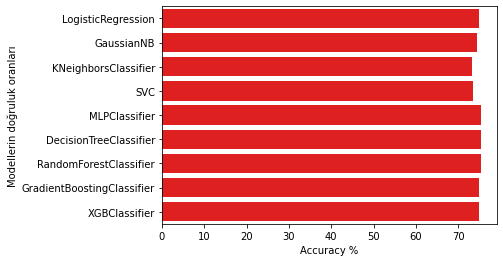

In [222]:
sonuc = []

sonuclar = pd.DataFrame(columns=["Modeller", "Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    if model == mlp_tuned:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns=["Modeller", "Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
sns.barplot(x = "Accuracy", y = "Modeller", data = sonuclar, color = 'r')
plt.xlabel("Accuracy %")
plt.ylabel("Modellerin doğruluk oranları");